In [1]:
#===========================AGENDA================
#pandas-read_data into python......seaborn-visualize data
#eva_metrics and how do i choose which features to include in model.....

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
df = pd.read_csv("C:\\Users\\UMANG PATEL\\Desktop\\Scikit_learn\\Advertising.csv",index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


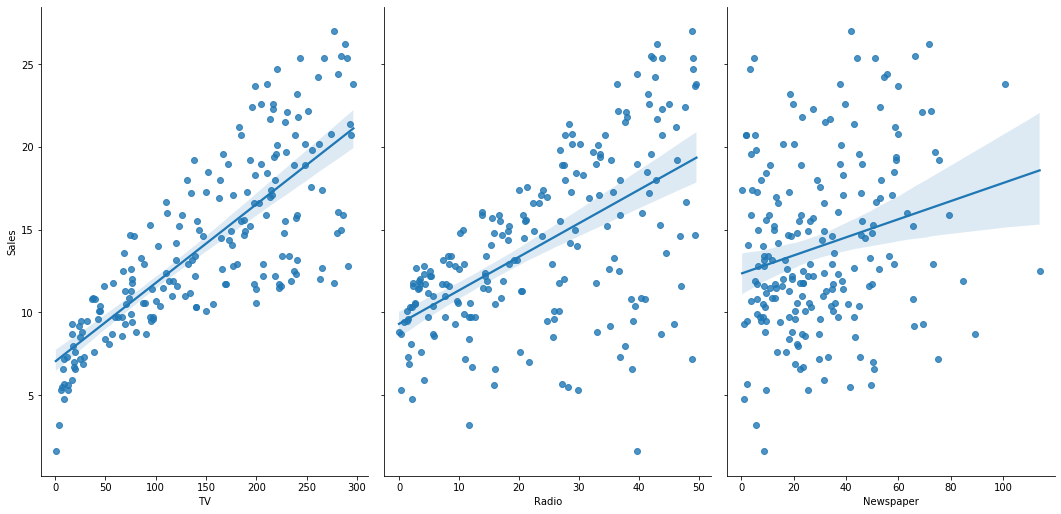

In [15]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind="reg")

In [16]:
# y = b0 + b1*x1 + b2*x2 +...........+bn*xn
# b0=intercept
# b1=coefficient for x1
# y = b0 + b1*TV + b2*Radio +..

In [78]:
feature_cols = ['TV','Radio','Newspaper']
X = df[feature_cols]
y = df['Sales']

In [79]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [80]:
#default split 75% for train and rest for test(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [81]:
from sklearn.linear_model import LinearRegression
lireg = LinearRegression()
lireg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
#model coefficient......
print(lireg.intercept_)
print(lireg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [83]:
#feature name ---- coeff_value
#this is a statment of association not causation(all possible values infulence)
# if ++ in TV spending was associated with decrease in sales then b1 = negative
zip(feature_cols,lireg.coef_)

In [84]:
y_pred = lireg.predict(X_test)

In [69]:
# In regressionn we need evaluation metrics for comparing conti. values
# ----------create somoe ex. numeric predictions and calculate THREE COMMON EVALUATION METRICS--------

In [70]:
true = [100,20,40,80]
pred = [110,30,30,80]
from sklearn import metrics

In [71]:
#MAE
print(metrics.mean_absolute_error(true,pred))
#MSE
print(metrics.mean_squared_error(true,pred))
#RMSE
print(np.sqrt(metrics.mean_squared_error(true,pred)))

7.5
75.0
8.660254037844387


In [85]:
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

1.4046514230328955


In [86]:
#newspaper feature excluded and RMSE......
#we have to choose combination so we get min no of RMSE..
feature_cols = ['TV','Radio']
X = df[feature_cols]
y = df['Sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)


lireg.fit(X_train,y_train)
y_pred = lireg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3879034699382888
